In [74]:
%matplotlib inline
import pandas as pd
import bisect

In [60]:
data = pd.read_csv("data.csv")
a = data['a']
b = data['b']

In [5]:
def infos(i):
    d = data[i]
    return d.min(), d.max(), d.mean(), d.median()

In [9]:
infos('a'),infos('b')

((244562.0, 12121200000.0, 863486529.1914285, 300660500.0),
 (907214000.0, 1.30108e+20, 7.567928099791775e+17, 4890575000000000.0))

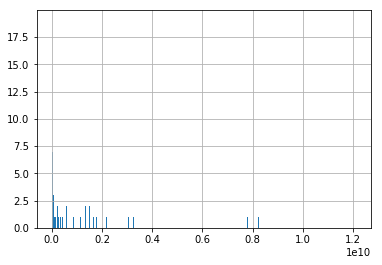

In [23]:
a.hist(bins=10000)


In [62]:
data.sort_values(by='a',ascending=0)

,category,a,b,c,d,e,f,g
790,lmfish,1.212120e+10,1.301080e+20,1.387860e+22,2.003120e+21,1.134500e+42,-8.624440e+30,1.050060e+43
504,elephant,1.018590e+10,1.441570e+19,3.830390e+23,2.148210e+23,6.713640e+45,3.848670e+32,6.125550e+46
500,elephant,8.965490e+09,2.914840e+18,6.065310e+22,3.102580e+22,-6.313450e+44,-5.159830e+31,1.188630e+45
320,deer,8.662650e+09,1.983050e+19,4.120960e+23,1.931690e+22,1.686150e+45,5.360390e+31,-3.567450e+44
324,deer,8.662550e+09,1.982460e+19,4.143460e+23,1.688870e+22,1.279720e+45,3.671030e+31,-5.985760e+44
325,deer,8.514190e+09,1.962400e+19,3.961650e+23,2.072130e+22,1.702060e+45,8.434090e+31,7.922980e+44
323,deer,8.478720e+09,1.949470e+19,3.568630e+23,1.071650e+22,5.522310e+44,1.786850e+31,-3.663950e+44
322,deer,8.478640e+09,1.949630e+19,3.529770e+23,1.314420e+22,8.786750e+44,3.574110e+31,-1.718220e+44
505,elephant,8.232620e+09,3.166980e+18,1.456110e+23,5.234160e+22,4.573720e+44,1.805590e+31,4.546530e+45
265,classic,8.225820e+09,3.847360e+19,2.507960e+23,6.525020e+22,7.251230e+45,3.041400e+32,4.134330e+45


In [116]:
data.rank()

,category,a,b,c,d,e,f,g
0,98.0,371.0,98.0,332.0,330.0,542.0,477.0,710.0
1,98.0,407.0,194.0,376.0,255.0,524.0,250.0,683.0
2,98.0,472.0,165.0,460.0,360.0,603.0,226.0,740.0
3,98.0,454.0,238.0,478.0,345.0,570.0,567.0,739.0
4,98.0,456.0,307.0,317.0,254.0,239.0,463.0,693.0
5,98.0,373.0,66.0,292.0,252.0,503.0,430.0,674.0
6,98.0,393.0,155.0,312.0,286.0,525.0,488.0,690.0
7,98.0,447.0,112.0,276.0,279.0,480.0,245.0,694.0
8,98.0,464.0,233.0,531.0,452.0,665.0,592.0,759.0
9,98.0,217.0,122.0,214.0,194.0,411.0,272.0,645.0


In [86]:
la = [j['a'] for i, j in data.sort_values(by='a').iterrows()]

In [66]:
data.ix[670]['category']

'hat'

In [75]:
bisect.bisect(la,1000000)

9

In [83]:
la[8], la[9]

(960452.0, 1069070.0)

In [100]:
la = data.sort_values(by='a')
for i,j in la.iterrows():
    print(i)

670
294
289
299
298
292
52
733
965
961
720
297
962
963
964
966
862
669
1010
663
906
1012
1014
671
971
54
49
1013
1015
970
1017
972
960
1019
1016
969
1018
1005
974
973
1006
1007
968
1008
1009
223
224
1011
863
967
869
724
482
730
723
732
95
633
222
221
722
734
104
100
102
900
48
47
92
96
855
97
667
295
286
953
93
94
98
291
99
101
90
91
228
229
231
210
227
731
235
230
226
234
233
236
232
237
225
239
238
481
994
951
103
285
904
157
867
158
525
57
56
659
658
645
159
784
814
287
1002
786
161
296
155
160
911
996
164
162
652
651
653
782
649
647
646
648
150
249
240
163
250
993
251
166
992
995
179
252
930
944
943
169
167
171
253
165
105
248
254
168
826
247
176
660
178
536
172
173
654
657
655
656
174
177
106
118
532
991
175
531
661
114
170
151
527
822
108
111
110
912
152
241
589
529
913
40
41
813
721
727
153
534
1000
243
528
593
999
588
997
244
596
585
871
587
9
783
827
154
875
590
905
880
156
242
907
594
874
998
882
990
586
878
595
781
903
879
598
829
591
883
877
597
872
599
876
870
729
873
948


In [132]:
d = []
for i,j in data.rank().iterrows():
    d.append(((j['b']-35)**2 + (j['a']-200)**2, i, j['a'], j['b']))
d.sort()
d

[(1369.0, 813, 200.0, 72.0),
 (3845.0, 729, 249.0, 73.0),
 (4628.0, 727, 202.0, 103.0),
 (4762.0, 721, 201.0, 104.0),
 (6565.0, 814, 119.0, 37.0),
 (7858.0, 9, 217.0, 122.0),
 (12746.0, 812, 295.0, 96.0),
 (13226.0, 728, 255.0, 136.0),
 (14216.0, 731, 90.0, 81.0),
 (15028.0, 822, 188.0, 157.0),
 (15506.0, 867, 109.0, 120.0),
 (18265.0, 818, 323.0, 91.0),
 (18772.0, 296, 124.0, 149.0),
 (19018.0, 911, 127.0, 152.0),
 (19449.0, 47, 68.0, 80.0),
 (19450.0, 855, 71.0, 88.0),
 (19469.0, 286, 75.0, 97.0),
 (19620.0, 734, 62.0, 11.0),
 (19625.0, 48, 67.0, 79.0),
 (19669.0, 56, 113.0, 145.0),
 (19850.0, 722, 61.0, 12.0),
 (20065.0, 57, 112.0, 146.0),
 (20072.0, 285, 106.0, 141.0),
 (20225.0, 667, 73.0, 99.0),
 (20264.0, 811, 342.0, 45.0),
 (20561.0, 287, 120.0, 154.0),
 (20644.0, 210, 88.0, 125.0),
 (20761.0, 249, 140.0, 166.0),
 (20905.0, 732, 56.0, 22.0),
 (21268.0, 481, 102.0, 143.0),
 (21281.0, 221, 60.0, 76.0),
 (21474.0, 250, 143.0, 170.0),
 (21481.0, 222, 59.0, 75.0),
 (21754.0, 723, 55

In [133]:
for i in range(200):
    print(data.ix[d[i][1]]['category'])

octopus
horseshoe
horseshoe
horseshoe
octopus
apple
octopus
horseshoe
horseshoe
octopus
pocket
octopus
crown
sea_snake
bell
pocket
crown
horseshoe
bell
bell
horseshoe
bell
crown
hat
octopus
crown
chicken
chopper
horseshoe
dog
chicken
chopper
chicken
horseshoe
fly
horseshoe
crown
horseshoe
tree
fly
pocket
horseshoe
crown
pocket
sea_snake
chopper
dog
sea_snake
chicken
chicken
guitar
stef
chopper
stef
fly
truck
bottle
bottle
stef
truck
stef
truck
bottle
bottle
bottle
bottle
stef
bottle
truck
truck
beetle
truck
truck
beetle
truck
stef
truck
beetle
stef
fountain
stef
truck
truck
bell
truck
bell
fountain
spring
bottle
apple
hat
bottle
chopper
stef
truck
chopper
bottle
truck
bottle
hat
children
sea_snake
bottle
bottle
children
truck
children
bottle
children
children
apple
tree
children
children
children
pocket
children
children
children
stef
children
children
car
hat
children
stef
children
stef
stef
crown
ray
fountain
ray
stef
fountain
chopper
stef
horseshoe
bottle
car
bell
crown
horseshoe
cr

In [135]:
data.shape

(1050, 8)